<a href="https://colab.research.google.com/github/Molly-Abisage/WK9_KNN-and-NAIVE-BAYES-CLASSIFIERS/blob/main/NAIVE_BAYES_WEEK_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Defining the question

### Specifying the research question

*   We have been given a dataset containing details on emails with malicious and legitimate information, with the features describing what kind of content is in these emails, we are required to use the Naive Bayes Classifier to identify an email as spam or not spam.


###Defining the metrics for success

The metrics of this study is:

*   Obtaining an accuracy score of at least 90% on the model
*   Use of the most appropriate metrics to assess our models and explain why they are appropriate.



### Context


**Spam detection**

Accurate spam detection is considered a difficult task due to several reasons including:
*    **subjective nature of spam** - _for instance, a message containing several drug names might be a spam, but it might not be the case if the message is exchanged in a context of medical organizations_ 

 
This study will therefore make use of the Naive Bayes Classifier to detect if an email is spam or not.


###Record the experimental design

The following steps will be followed for the study:

1.   Importing libraries and loading data from a csv file
1.   Checking the data
1.   Conducting necessary data cleaning procedures
1.   Performing Exploratory Data Analysis
1.   Performing data pre-processing
1.   Building the most suitable model for this study
1.   Assessing/ Evaluating the model
1.   Making a conclusion on the study


###Data Relevance


An assumption of Spam detection that its content differs from that of a legitimate email. 

Statically features of a typical spam email include:
1.   char_freq_! 
1.   word_freq_remove 
1.   word_feq_credit 
1.   char_feq_
1.   word_feq_hp 
1.   word_feq_edu 
1.   capital_run_length_longest 
1.   word_feq_free 
1.   capital_run_length_total 
1.   word_feq_george 

The dataset provided contains all these features hence we consider the data relevant for the study.


## Reading the data

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# loading datasets
spam = pd.read_csv("/content/spambase (2).data")
spam.head(3)


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [6]:
# previewing the top of the dataset
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [7]:
# previewing the bottom of the dataset
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# checking the size of the dataset
spam.shape

display("There are {} observations with {} features ".format(spam.shape[0], spam.shape[1]))

'There are 4600 observations with 58 features '

In [ ]:
# investigating the features
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

All the columns contained above are numerical features

 **External dataset validation**

In [ ]:
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Data relevance of the spam dataset:- https://help.campaignmonitor.com/


## Tidying the dataset

In [8]:
# lets check for missing data
spam.isnull().values.any()

False

The dataset appears complete because we don't have any missing values

In [9]:
#lets check for duplicates
print(spam[spam.duplicated()])

#we see that _capital_run_length_total_ column has duplicates but they are unique so we dont omit nlike the other columns

        0  0.64  0.64.1  0.1  0.32   0.2  ...   0.43  0.44   3.756   61  278  1
25    0.0   0.0    0.00  0.0   0.0  0.00  ...  0.196   0.0   5.466   22   82  1
102   0.0   0.0    0.64  0.0   0.0  0.64  ...  0.000   0.0  10.068  131  292  1
103   0.0   0.0    0.00  0.0   0.0  0.00  ...  0.000   0.0   5.500   22   66  1
104   0.0   0.0    0.64  0.0   0.0  0.64  ...  0.000   0.0  10.068  131  292  1
105   0.0   0.0    0.00  0.0   0.0  0.00  ...  0.000   0.0   5.500   22   66  1
...   ...   ...     ...  ...   ...   ...  ...    ...   ...     ...  ...  ... ..
4438  0.0   0.0    0.74  0.0   0.0  0.00  ...  0.000   0.0   2.587   55  282  0
4440  0.0   0.0    0.74  0.0   0.0  0.00  ...  0.000   0.0   2.587   55  282  0
4536  0.0   0.0    0.00  0.0   0.0  0.00  ...  0.000   0.0   1.000    1    6  0
4540  0.0   0.0    0.00  0.0   0.0  0.00  ...  0.000   0.0   1.000    1    2  0
4549  0.0   0.0    0.00  0.0   0.0  0.00  ...  0.000   0.0   2.000    3    4  0

[391 rows x 58 columns]


In [ ]:
#checking for uniformity in the data
spam.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

All the column have appropriate data types

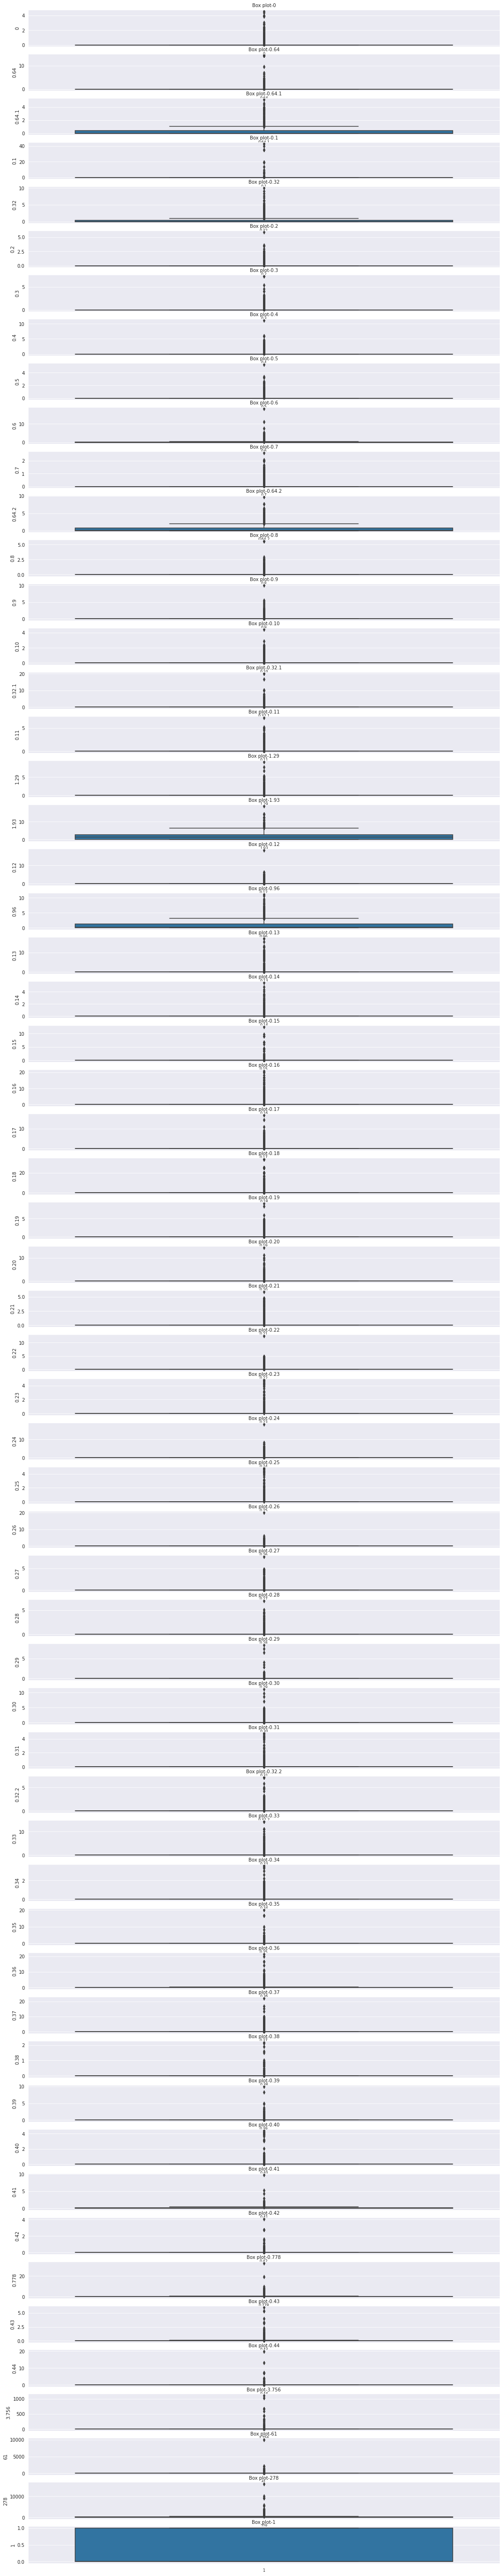

In [ ]:
##checking for outliers
# numerical_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

fig, ax = plt.subplots(len(spam.columns), figsize = (18, 100))

for i, col_val in enumerate(spam.columns):

  sns.boxplot(y= spam[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

noted:
Most of the columns seem to have most of the data points concentrated at zero. The columns also seem to have a few observations as outlier values. 


As the outlier values are the one's that determine if an email will be classified as spam or not, we will retain them. 

## Exploratory Data Analysis

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [ ]:
#lets import the necessary libraries

import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport
ProfileReport(spam, title = "spam email report")

##Univariate Analysis

In [ ]:
# statistical summary
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

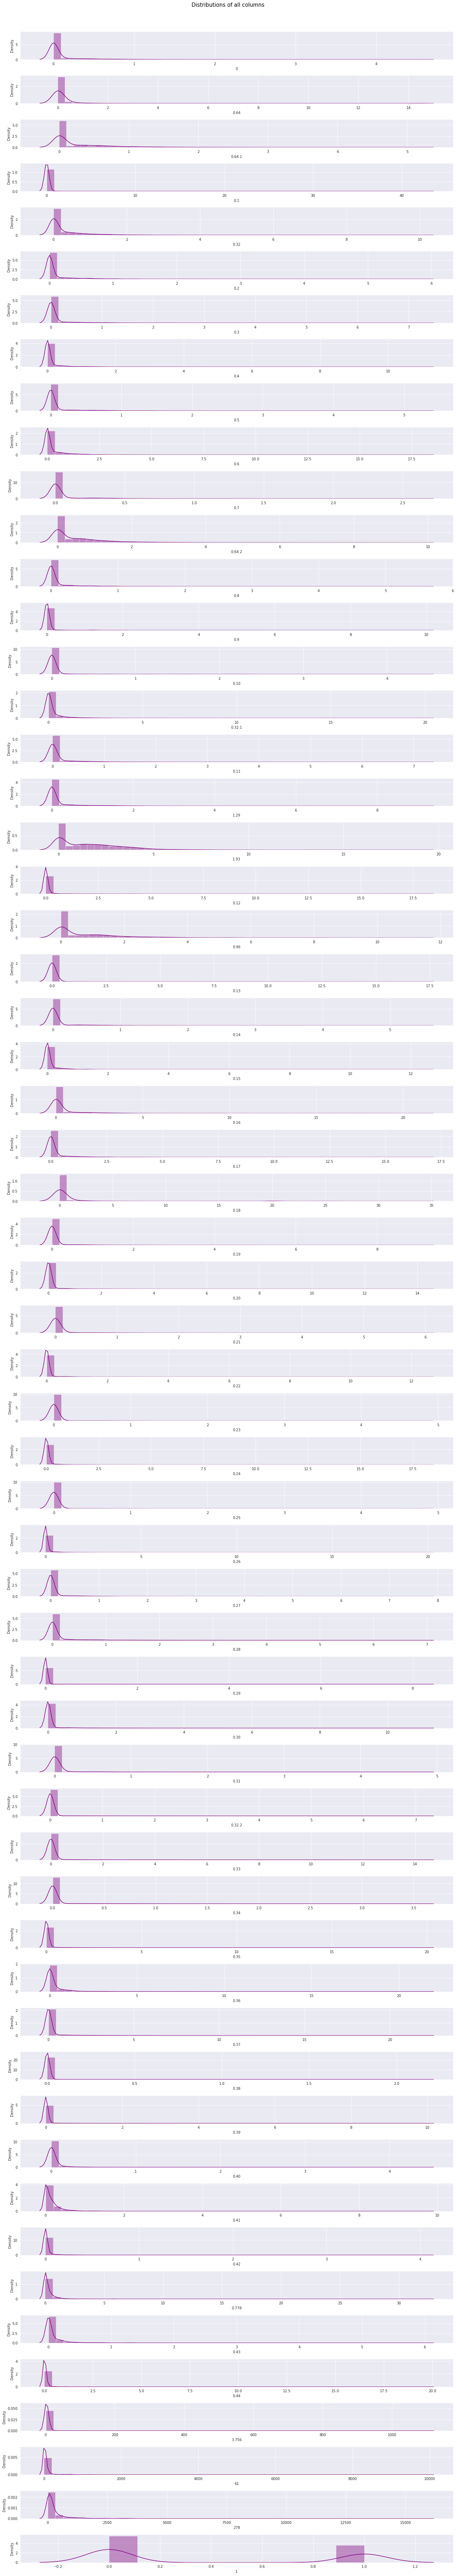

In [ ]:
# plotting distribution plots for all the above columns 

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(spam.columns), figsize = (18, 100))
fig.suptitle('Distributions of all columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), spam, spam.columns):
  sns.distplot(spam[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

**Observations**

All the independent variables have the mode at 0 and are positively skewed. The dependent variable is categorical.

In [10]:
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'spam']

print(len(col_names))

58


In [14]:
spam = pd.read_csv('/content/spambase (2).data', names =col_names, sep=',', header = None)
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [16]:
# obtaining the count of the target variable

spam[col_names].value_counts()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  word_freq_people  word_freq_report  word_freq_addresses  word_freq_free  word_freq_business  word_freq_email  word_freq_you  word_freq_credit  word_freq_your  word_freq_font  word_freq_000  word_freq_money  word_freq_hp  word_freq_hpl  word_freq_george  word_freq_650  word_freq_lab  word_freq_labs  word_freq_telnet  word_freq_857  word_freq_data  word_freq_415  word_freq_85  word_freq_technology  word_freq_1999  word_freq_parts  word_freq_pm  word_freq_direct  word_freq_cs  word_freq_meeting  word_freq_original  word_freq_project  word_freq_re  word_freq_edu  word_freq_table  word_freq_conference  char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  capital_run_length_average  capital_run_length_longest  capital_run_length_total  spam
0.0             0.00         

We have a total of 2788 counts if class 0 (not spam) and 1813 (spam) hence we are dealing with an imbalanced class of more emails that were identified as no spam as compared to those identified as spam.

The plot affirms the counts as had been stated above

##Bivariate Analysis

We will use whiskerplots to see how the target variable relates to some numerical columns


**Observations:**

Spam emails have such high values of capital letters as compared to emails that are not spam. However, for the _capital_run_length_total_ column, the number of observations seem to be the same in both classes only that class 1 has more observations as outliers as compared to class 0. Most of the spam emails have observations concentrated around the zero mark with a few points as outliers.

In [ ]:
# let's see how the percentage of characters in an email relate to spam emails 
# 
character_columns = ['char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%23']

fig, ax = plt.subplots(3, 2, figsize=(10, 12))

for var, subplot in zip(character_columns, ax.flatten()):
    sns.boxplot(x='class', y=var, data=spam, ax=subplot)              


**Observations**:

Depending on the type of character, an email can either be a spam or not a spam. Emails that are not spam have more of **char_freq_%3B, char_freq_%5B, 'char_freq_%21** characters while spam emails have more of **char_freq_%28, char_freq_%24, 'char_freq_%23** characters. 

KeyError: ignored

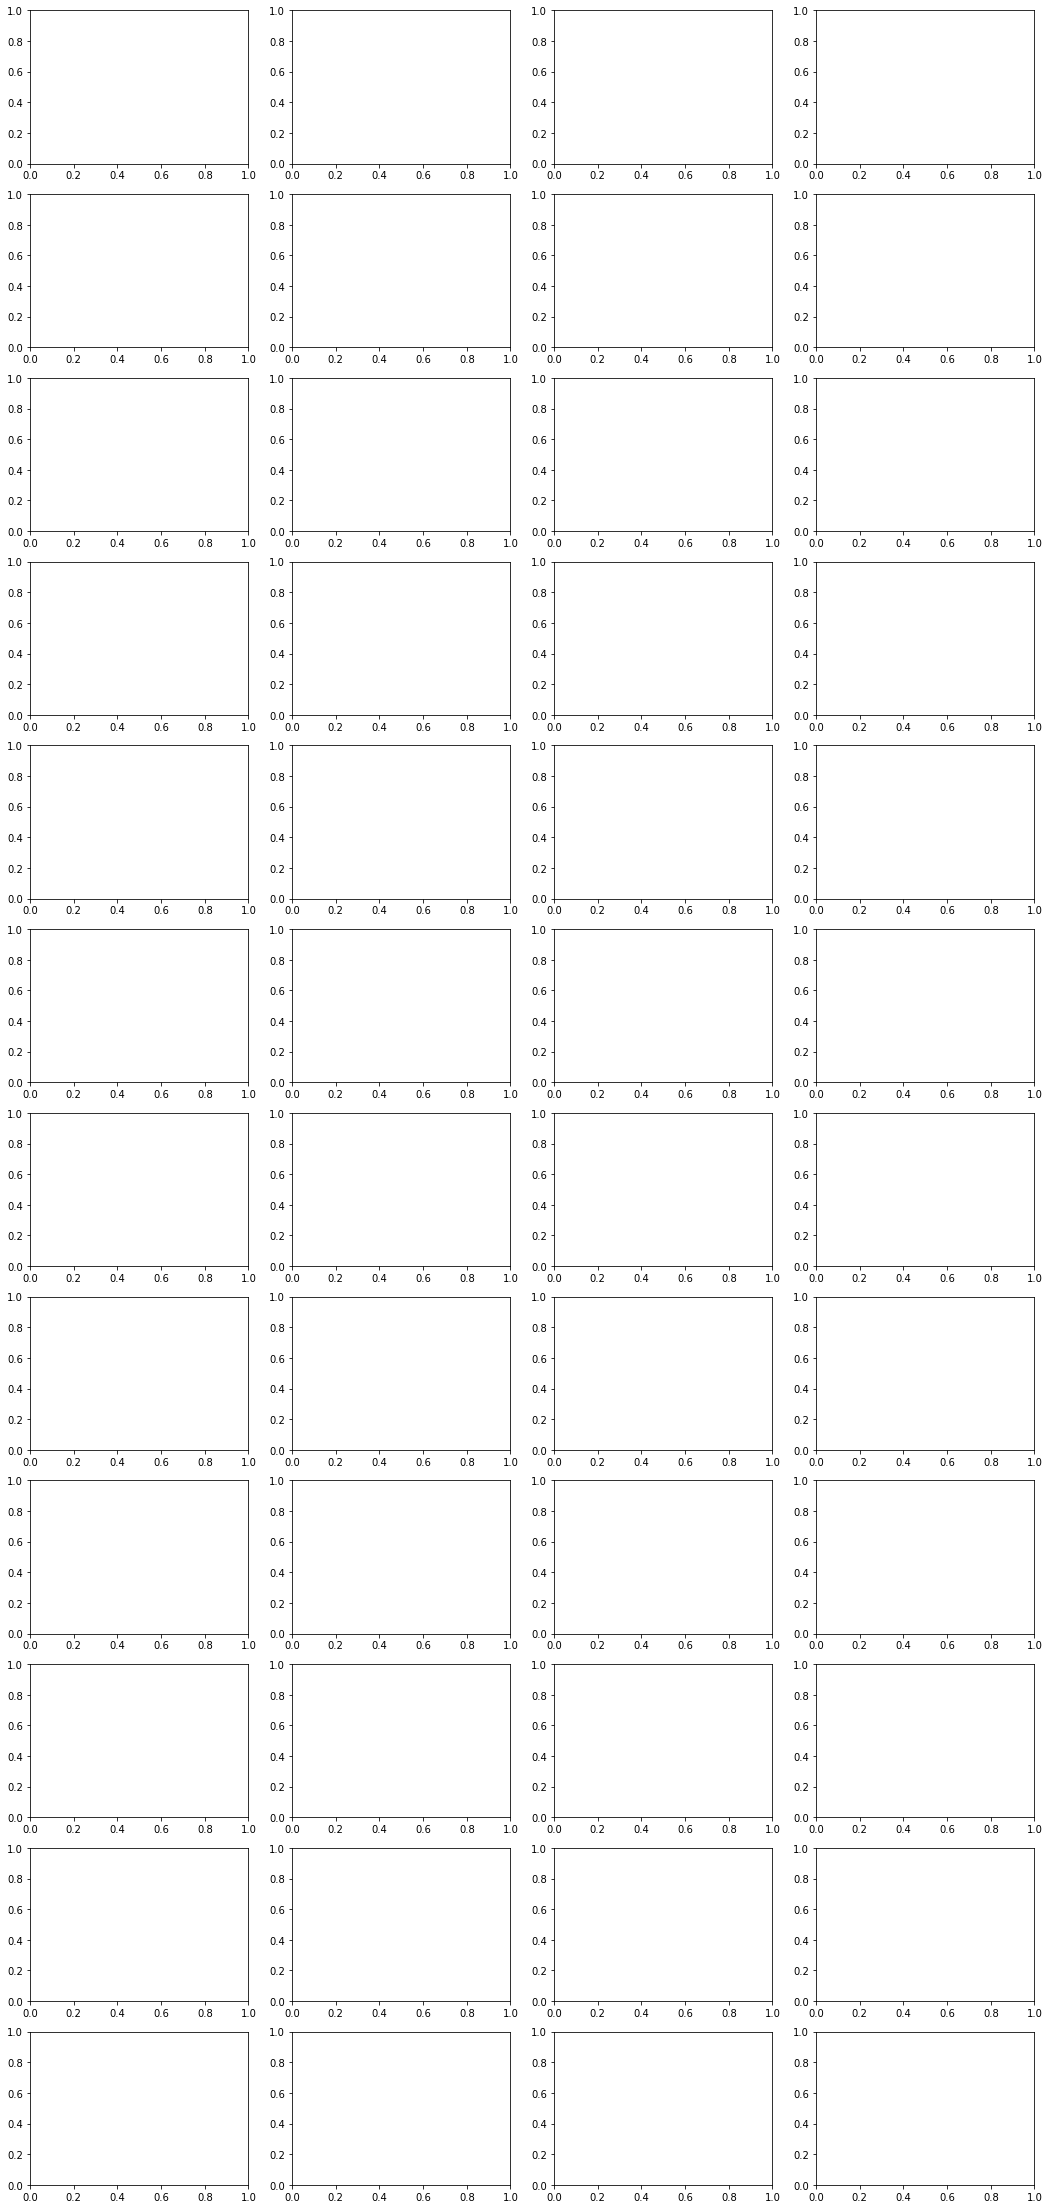

In [27]:
# # let's see how the type of words in an email relate to the email being spam or not


word_columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d','word_freq_our', 'word_freq_over', 
       'word_freq_remove','word_freq_internet', 'word_freq_order', 'word_freq_mail','word_freq_receive', 'word_freq_will', 
       'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free','word_freq_business', 'word_freq_email', 
       'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000','word_freq_money', 'word_freq_hp', 
       'word_freq_hpl', 'word_freq_george','word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet','word_freq_857', 
       'word_freq_data', 'word_freq_415', 'word_freq_85','word_freq_technology', 'word_freq_1999', 'word_freq_parts','word_freq_pm', 
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting','word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference']

fig, ax = plt.subplots(12, 4, figsize=(18, 40))

for var, subplot in zip(word_columns, ax.flatten()):
    sns.boxplot(x=[word_columns], y=var, data=spam, ax=subplot)              

###Feature Reduction

In [28]:
# Data Reduction
X = spam.drop('spam', axis = 1)
y = spam['spam']    


# import train_test_split
from sklearn.model_selection import train_test_split

# splitting the data into 80% train set and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# applying Linear Discriminant Analyis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 19)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# printing factors that affect the price of a house in order of how much weight each of the factors carry 
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)

# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(57, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,0
word_freq_remove,0.803820
word_freq_your,0.661984
word_freq_000,0.570291
char_freq_$,0.552485
word_freq_free,0.546998
word_freq_our,0.526703
char_freq_!,0.458950
capital_run_length_total,0.456746
word_freq_font,0.439215
word_freq_money,0.375436


##Baseline Model

In [29]:
# necessary imports
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



In [30]:
X = spam.drop('spam', axis = 1)
y = spam['spam']    

# splitting the data into 80 - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

predicted = model.predict(X_test)
# print(np.mean(predicted == y_test))

from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(y_test, predicted))


Accuracy 0.8154180238870793


In [31]:
# evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn import metrics

confusion_test = metrics.confusion_matrix(y_test, predicted)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,403,156
Actual 1,14,348


Our baseline model has an accuracy of 81.5%. As we are interested in the spam emails(class 1), We therefore have 347 cases of true positives and 411 cases of true negatives. The number of false positives is 148 which is quite high while the number of false negatives is 15. 

Let's employ techniques that will help in improving our model.

##Pre-processing - Improving model Performance

###Multicollinearirity

In [34]:
# identify highly correlated features 
# create correlation matrix

corr_matrix = spam.corr().abs()
corr_matrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,0.024349,0.134072,0.188155,0.072504,0.061686,0.066424,0.048680,0.041251,0.052799,0.039066,0.032058,0.041014,0.027690,0.044954,0.054673,0.057312,0.007960,0.011134,0.036095,0.009703,0.026070,0.024292,0.022116,0.037105,0.034056,0.000953,0.017755,0.026505,0.021196,0.033301,0.058292,0.117419,0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,0.016759,1.000000,0.033526,0.006923,0.023760,0.024840,0.003918,0.016280,0.003826,0.032962,0.006864,0.040398,0.018858,0.009206,0.005330,0.009117,0.018370,0.033500,0.055476,0.015806,0.018191,0.008850,0.020502,0.001984,0.043483,0.038211,0.030307,0.029221,0.021940,0.027508,0.018097,0.003326,0.024903,0.004303,0.024058,0.028198,0.024013,0.008922,0.019124,0.014821,0.015420,0.025177,0.002370,0.019739,0.016418,0.023858,0.009818,0.015747,0.007282,0.049837,0.018527,0.014461,0.009605,0.001946,0.002083,0.000271,0.022680,0.030224
word_freq_all,0.065627,0.033526,1.000000,0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,0.035681,0.123671,0.041145,0.087924,0.062459,0.108886,0.050648,0.057726,0.032547,0.038927,0.061870,0.054759,0.061706,0.048335,0.046504,0.067015,0.032407,0.014809,0.047066,0.030956,0.005811,0.044325,0.053464,0.050664,0.056655,0.029339,0.026344,0.033213,0.016495,0.033120,0.108140,0.087618,0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,0.006923,0.020246,1.000000,0.003238,0.010014,0.019784,0.010268,0.002454,0.004947,0.012976,0.019221,0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,0.010834,0.005381,0.008176,0.028102,0.011368,0.035360,0.015181,0.013708,0.010684,0.010368,0.007798,0.010476,0.007529,0.006717,0.008075,0.006729,0.006122,0.006515,0.007761,0.002669,0.004602,0.007643,0.005670,0.008095,0.009268,0.005933,0.012957,0.009181,0.003348,0.001924,0.000591,0.012370,0.007148,0.003138,0.010862,0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,0.020207,0.070037,0.000039,0.072502,0.075456,0.088011,0.061501,0.032048,0.052066,0.042535,0.026748,0.031998,0.026960,0.049732,0.048844,0.072599,0.130812,0.042044,0.021442,0.047505,0.115041,0.048879,0.015234,0.042336,0.077986,0.026900,0.032005,0.032759,0.046361,0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,0.024840,0.087564,0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.059329,0.084402,0.087271,0.069051,0.066223,0.048673,0.048127,0.046383,0.036835,0.034164,0.037315,0.054315,0.052819,0.057465,0.017918,0.047619,0.029866,0.029457,0.054812,0.030616

In [35]:
# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,NaN,0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,0.024349,0.134072,0.188155,0.072504,0.061686,0.066424,0.048680,0.041251,0.052799,0.039066,0.032058,0.041014,0.027690,0.044954,0.054673,0.057312,0.007960,0.011134,0.036095,0.009703,0.026070,0.024292,0.022116,0.037105,0.034056,0.000953,0.017755,0.026505,0.021196,0.033301,0.058292,0.117419,0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,NaN,NaN,0.033526,0.006923,0.023760,0.024840,0.003918,0.016280,0.003826,0.032962,0.006864,0.040398,0.018858,0.009206,0.005330,0.009117,0.018370,0.033500,0.055476,0.015806,0.018191,0.008850,0.020502,0.001984,0.043483,0.038211,0.030307,0.029221,0.021940,0.027508,0.018097,0.003326,0.024903,0.004303,0.024058,0.028198,0.024013,0.008922,0.019124,0.014821,0.015420,0.025177,0.002370,0.019739,0.016418,0.023858,0.009818,0.015747,0.007282,0.049837,0.018527,0.014461,0.009605,0.001946,0.002083,0.000271,0.022680,0.030224
word_freq_all,NaN,NaN,NaN,0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,0.035681,0.123671,0.041145,0.087924,0.062459,0.108886,0.050648,0.057726,0.032547,0.038927,0.061870,0.054759,0.061706,0.048335,0.046504,0.067015,0.032407,0.014809,0.047066,0.030956,0.005811,0.044325,0.053464,0.050664,0.056655,0.029339,0.026344,0.033213,0.016495,0.033120,0.108140,0.087618,0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,NaN,NaN,NaN,NaN,0.003238,0.010014,0.019784,0.010268,0.002454,0.004947,0.012976,0.019221,0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,0.010834,0.005381,0.008176,0.028102,0.011368,0.035360,0.015181,0.013708,0.010684,0.010368,0.007798,0.010476,0.007529,0.006717,0.008075,0.006729,0.006122,0.006515,0.007761,0.002669,0.004602,0.007643,0.005670,0.008095,0.009268,0.005933,0.012957,0.009181,0.003348,0.001924,0.000591,0.012370,0.007148,0.003138,0.010862,0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,NaN,NaN,NaN,NaN,NaN,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,0.020207,0.070037,0.000039,0.072502,0.075456,0.088011,0.061501,0.032048,0.052066,0.042535,0.026748,0.031998,0.026960,0.049732,0.048844,0.072599,0.130812,0.042044,0.021442,0.047505,0.115041,0.048879,0.015234,0.042336,0.077986,0.026900,0.032005,0.032759,0.046361,0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,NaN,NaN,NaN,NaN,NaN,NaN,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.211455,0.059329,0.084402,0.087271,0.069051,0.066223,0.048673,0.048127,0.046383,0.036835,0.034164,0.037315,0.054315,0.052819,0.057465,0.017918,0.047619,0.029866,0.029457,0.054812,0.030616,0.028826,0.053637,0.033046,0.014343,0.031693,0.019119,0.008705,0.015133,0.065043,0.105692,0.019894,0.010

In [36]:
# find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any (upper[column] > 0.95)]
to_drop

['word_freq_415']

We got one column {word_freq_415}that a high correlation that is greater than 0.95 which we will drop in an attempt to improve model performance.

In [37]:
# drop highly correlated features

spam = spam.drop(spam[to_drop], axis=1)

In [38]:
# calculating VIF scores to verify we do Not have any other columns that are highly correlated

pd.DataFrame(np.linalg.inv(corr_matrix.values), index = corr_matrix.index, columns = corr_matrix.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.135326,-0.005835,-0.008013,-0.004452,0.009717,-0.014739,0.044030,0.050662,-0.054455,0.010444,-0.149730,-0.074883,-0.023285,-0.006848,0.059060,-0.025488,-0.034582,-0.017331,-0.028716,0.037197,-0.125791,-0.011193,-0.116048,-0.166034,-0.019032,-0.002158,-0.023979,-0.001019,-0.011093,-0.015393,0.004086,-0.514686,-0.015841,0.597290,-0.005606,-0.018767,-0.032386,-0.004223,0.017966,-0.068621,0.019535,0.011715,0.003506,-0.001683,-0.000458,-0.006932,0.007234,-0.000895,-0.003500,0.026631,-0.016775,-0.024512,-0.042760,-0.001624,-0.021776,-0.009622,-0.031917,0.064236
word_freq_address,-0.005835,1.016792,-0.021882,-0.004453,-0.008906,-0.016090,0.009797,-0.010322,0.011515,-0.030366,0.015058,-0.030688,-0.001928,-0.002977,0.009657,0.001204,-0.009001,-0.032975,-0.027449,-0.013907,0.018076,0.002983,-0.007757,0.014037,-0.027267,-0.017662,-0.020134,0.003380,-0.010208,-0.017690,-0.000980,0.225669,-0.017921,-0.115942,-0.009239,-0.033038,-0.004546,-0.000993,-0.007950,-0.029498,-0.005711,-0.009348,0.010113,-0.015480,-0.008165,-0.013624,-0.007353,-0.012489,0.000919,-0.066562,-0.010655,-0.001085,0.002934,0.003564,-0.017291,0.056943,-0.034273,0.015549
word_freq_all,-0.008013,-0.021882,1.109357,-0.011454,-0.025872,-0.022115,0.032043,0.032427,-0.033381,0.023469,0.029216,-0.060308,-0.009247,0.013546,-0.051348,-0.021400,0.029539,-0.068641,-0.066985,0.006544,-0.089560,-0.017591,-0.047720,0.024983,-0.038838,0.010163,-0.056962,-0.012177,-0.047256,0.059864,0.039121,0.031105,-0.024157,-0.100258,-0.009099,0.027271,-0.023258,-0.031792,0.013549,-0.024023,0.000964,0.063935,-0.006361,-0.034883,-0.008499,-0.021255,-0.022883,-0.004672,-0.007711,0.053375,-0.009929,-0.059732,0.002891,0.013648,-0.061823,-0.053408,0.008281,-0.087440
word_freq_3d,-0.004452,-0.004453,-0.011454,1.006818,0.011292,0.001884,-0.004443,-0.003568,0.012019,0.001308,-0.002249,-0.021212,-0.005935,-0.008210,0.012727,0.010853,0.009136,-0.009644,0.007300,0.005372,0.018858,-0.029068,0.004299,-0.025667,-0.001067,-0.000705,0.001636,-0.003695,0.003205,-0.004298,0.000208,0.013277,-0.000669,0.000608,0.006885,0.000331,0.002604,-0.001656,0.002978,-0.014503,-0.000815,-0.000581,-0.002750,-0.000110,-0.003855,0.000565,0.000056,0.003214,0.015233,-0.001704,-0.002862,0.011383,0.010178,0.010448,0.008749,-0.019269,0.002240,-0.071345
word_freq_our,0.009717,-0.008906,-0.025872,0.011292,1.129011,0.004329,-0.057577,0.041438,0.043728,0.008714,0.008351,-0.049295,-0.004010,-0.000147,-0.029803,-0.017499,-0.097975,-0.002205,-0.008968,0.026438,-0.035843,0.006379,0.009560,0.059014,-0.001350,-0.006777,-0.049438,-0.029057,0.063664,-0.020024,-0.017081,0.095126,0.002728,-0.045903,0.003039,-0.024921,-0.016335,-0.120071,-0.003478,-0.008604,-0.007311,-0.098780,-0.008320,0.008656,-0.010823,-0.038545,-0.015923,-0.008609,-0.018012,-0.019630,-0.003720,0.048916,0.033969,0.019149,-0.036482,-0.011629,0.067391,-0.232064
word_freq_over,-0.014739,-0.016090,-0.022115,0.001884,0.004329,1.108617,0.003331,-0.033413,-0.047503,0.051940,0.016295,0.005782,-0.035829,0.015759,-0.085364,0.037670,0.007357,-0.004102,-0.028193,-0.016175,-0.008432,0

From the above, there is no column that has VIF score greater than 5 hence we can conclude our data does not exhibit multicollinearity

In [39]:
# verifying the new shape of the datafarame
spam.shape

# verifies we dropped one column

(4601, 57)

###Dealing with Imbalanced classes.

As we have imbalanced datasets i.e we have more observations of emails that are not spam as compared to spam emails. Hence, we will upsample the spam emails so we can obtain a balanced number of both spam and non-spam classes

In [44]:
# creating dependent and independent sets

M = spam.drop('spam', axis = 1)
n = spam['spam']  

# normalizing our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
M_train = sc.fit_transform(M)
n_test = sc.transform(M)


In [46]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=test_size, random_state=seed)

# Put X and y training data back together again
Mn_train = pd.concat([M_train, n_train], axis=1)

# Split into spam and non - spam
Mn_train_0 = Mn_train[Mn_train['spam']==0]
Mn_train_1 = Mn_train[Mn_train['spam']==1]

# counting the two classes
print( 'Non spam class: ', Mn_train_0.shape[0] )
print( 'Spam class: ', Mn_train_1.shape[0] )

Non spam class:  1892
Spam class:  1190


In [47]:
# Resampling
from sklearn.utils import resample

# Undersampling non - spam emails (as we want them to be less as it is the majority class)
Mn_train_0_undersampled = resample(Mn_train_0, replace=True, n_samples=Mn_train_1.shape[0])
print( Mn_train_0_undersampled.shape)

# Oversample spam emails (as it is the minority class)
Mn_train_1_oversampled = resample(Mn_train_1, replace=True, n_samples=Mn_train_0.shape[0])
print( Mn_train_1_oversampled.shape )

(1190, 57)
(1892, 57)


In [49]:
# We can either go with the oversampled spam, or undersampled non spam
# Let's go with oversampling
combined = pd.concat([Mn_train_1_oversampled, Mn_train_0])

# Show that we now have balanced classes
combined['spam'].value_counts()

1    1892
0    1892
Name: spam, dtype: int64

##Gaussian Naive Bayes Classifier

The Naive Bayes Classifier is an algorithm for classification based on the Bayes Theorem and takes into account the assumption that the effect of a particular feature in a class is independent of other features hence why it is referred to as Naive.
The Gaussian Naive Bayes classifier assumes that the features are normally distributed.


In [51]:
#
Q = combined.drop('spam', axis = 1)
s = combined['spam']   

In [52]:
# splitting the data into 80 - 20%

Q_train, Q_test, s_train, s_test = train_test_split(Q, s, test_size=0.2, random_state=6) 

# normalizing our data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(Q_train, s_train) 

predicted = model.predict(Q_test)
print(np.mean(predicted == s_test))

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(s_test, predicted))
confusion_test = metrics.confusion_matrix(s_test, model.predict(Q_test))
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

0.8401585204755614
              precision    recall  f1-score   support

           0       0.94      0.73      0.83       391
           1       0.77      0.95      0.85       366

    accuracy                           0.84       757
   macro avg       0.86      0.84      0.84       757
weighted avg       0.86      0.84      0.84       757



,Predicted 0,Predicted 1
Actual 0,287,104
Actual 1,17,349


The Gaussian Naive Bayes Model has attained an accuracy score of ~85%. 
Let's break down our output:

*   True Positives: 350
*   True Negatives: 291
*   False Positives: 100
*   False Negatives: 16
*   Accuracy:  0.846 our model is approximately 85% accurate
*   Precision: 0.78 for the spam emails
*   Recall(Sensitivity): 0.96 for the spam emails
*   f1 score: 0.86

We can consider our model a better fot than the baseline model and it is generally a good model

No Skill: ROC AUC=0.500
Gaussian: ROC AUC=0.944


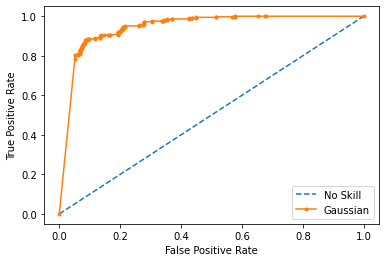

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(s_test))]

# predict probabilities
lr_probs = model.predict_proba(Q_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(s_test, ns_probs)
lr_auc = roc_auc_score(s_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(s_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(s_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gaussian')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

As we are dealing with balanced classes, we will use the ROC curve (False positive Rate against True positive Rate) to show the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Our curve is close to the top left corner and has a high value of the area under the curve, an indication that our model is skillful.

In [54]:
R = combined.drop('spam', axis = 1)
u = combined['spam']  

# splitting the data into 70 - 30%
R_train, R_test, u_train, u_test = train_test_split(R, u, test_size=0.3, random_state=6) 

# normalizing our data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(R_train, u_train) 

predicted = model.predict(R_test)
print(np.mean(predicted == u_test))

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(u_test, predicted))
confusion_test = metrics.confusion_matrix(u_test, predicted)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

0.8538732394366197
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       587
           1       0.78      0.97      0.86       549

    accuracy                           0.85      1136
   macro avg       0.87      0.86      0.85      1136
weighted avg       0.87      0.85      0.85      1136



,Predicted 0,Predicted 1
Actual 0,440,147
Actual 1,19,530


The accuracy score has increased slightly to approximately 86%. Breaking down our outputs:

True Positives: 525
True Negatives: 448
False Positives: 139
False Negatives: 24

The precision and recall have remained the same but the f1 score for the spam emails has increased slightly.

In [56]:
O = combined.drop('spam', axis = 1)
p = combined['spam']  

# splitting the data into 60 - 40%
O_train, O_test, p_train, p_test = train_test_split(O, p, test_size=0.4, random_state=6) 

# normalizing our data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(O_train, p_train) 

predicted = model.predict(O_test)
print(np.mean(predicted == p_test))

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(p_test, predicted))
confusion_test = metrics.confusion_matrix(p_test, predicted)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

0.8441215323645971
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       763
           1       0.78      0.95      0.86       751

    accuracy                           0.84      1514
   macro avg       0.86      0.84      0.84      1514
weighted avg       0.86      0.84      0.84      1514



,Predicted 0,Predicted 1
Actual 0,563,200
Actual 1,36,715


This accuracy of this model has reduced slightly in comparison to prior models.

##Challenging the Solution

The models we have built have an accuracy of approximately 85%. And f1 score of about 0.86 which is good enough. This was obtained after employing several model performance techniques such as resampling the classes to obtain equal number of classes and dropping highly multilinear features. Hence, it would be difficult to beat this particular model. We will therefore build SVM model. 

###SVM Model

In [57]:
R = combined.drop('spam', axis = 1)
u = combined['spam']  

# splitting the data into 70 - 30%
R_train, R_test, u_train, u_test = train_test_split(R, u, test_size=0.3, random_state=6) 

# Building the model 
from sklearn.svm import SVC,LinearSVC
rbfclassifier = SVC(kernel='rbf', gamma=0.01, C=2.0)

# Training the model using the training set
rbfclassifier.fit(R_train, u_train)

# Predict the response for the test set
u_pred = rbfclassifier.predict(R_test)

# assessing the model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(u_test, u_pred))
confusion_test = metrics.confusion_matrix(u_test, u_pred)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])
model_accuracy = accuracy_score(u_test,u_pred)
print(model_accuracy)


              precision    recall  f1-score   support

           0       0.90      0.83      0.86       587
           1       0.83      0.90      0.87       549

    accuracy                           0.87      1136
   macro avg       0.87      0.87      0.87      1136
weighted avg       0.87      0.87      0.87      1136

0.8653169014084507


In [ ]:
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel ="rbf"), param_grid=param_grid)
grid.fit(R_train, u_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The SVM model has given an accuracy score that is slightly higher than the Naive Bayes models hence this could be a bit difficult to beat. 

It is important to note that the Naive Bayes was a faster model as compared to SVM.